In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Importing dataset

In [2]:
df = pd.read_excel("Python_Flight_Fare_d.xlsx")

# show the first five rows

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Shape of data

In [4]:
df.shape

(10683, 11)

# Basic Statistics

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# check the count of null values in dataset column

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Drop Null Values

In [7]:
df.dropna(inplace = True)

# Chech basic information of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


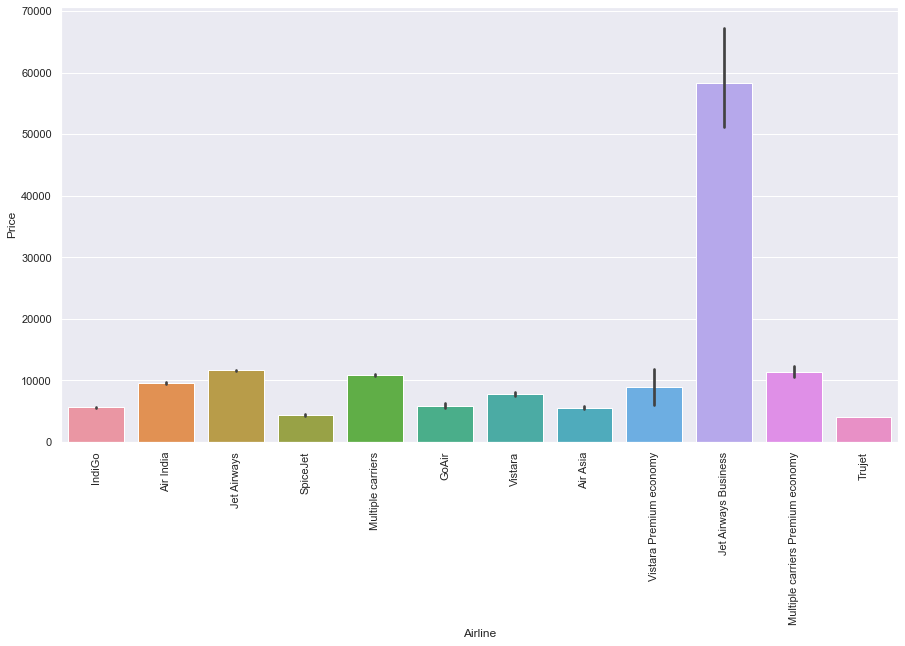

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

# LabelEncoding for Total_Stops

In [10]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop': 1,'2 stops':2,'3 stops':3,'4 stops': 4})

# Extract Day and Month

In [11]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [12]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [13]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [14]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5


In [15]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No info,7662,1,5,5,50


In [17]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [19]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15


In [25]:
#duration = list(df["Duration"])
#duration

# Extract hr and min from duration column

In [23]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour  

In [24]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

# now Extract hour and min from duration column and create two new column Duration_hours & Duration_mins

In [26]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [27]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)

In [28]:
df['Duration_time(mins)']=df['Duration_hours']*60+df['Duration_mins']

In [29]:
df.drop(['Duration_hours','Duration_mins'],axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_time(mins)
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


<AxesSubplot:xlabel='Airline'>

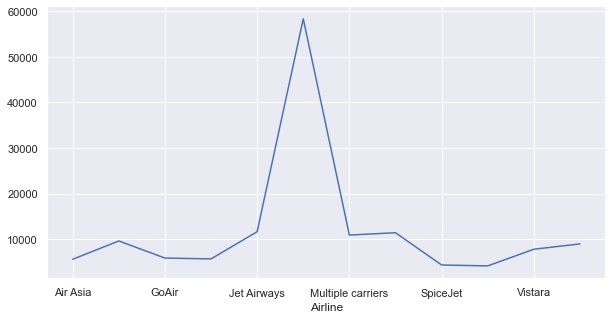

In [31]:
df.groupby('Airline')['Price'].mean().plot(figsize=(10,5))

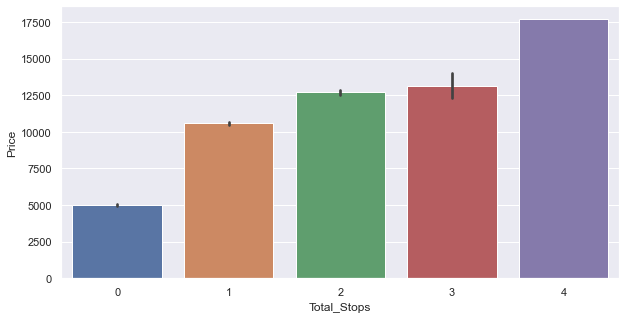

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.show()

In [33]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [34]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Source']=lb.fit_transform(df['Source'])
df['Destination']=lb.fit_transform(df['Source'])
df['Airline']=lb.fit_transform(df['Airline'])

In [36]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
Journey_day            0
Journey_month          0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Duration_time(mins)    0
dtype: int64

# Find Correlation and show it using heat map

<AxesSubplot:>

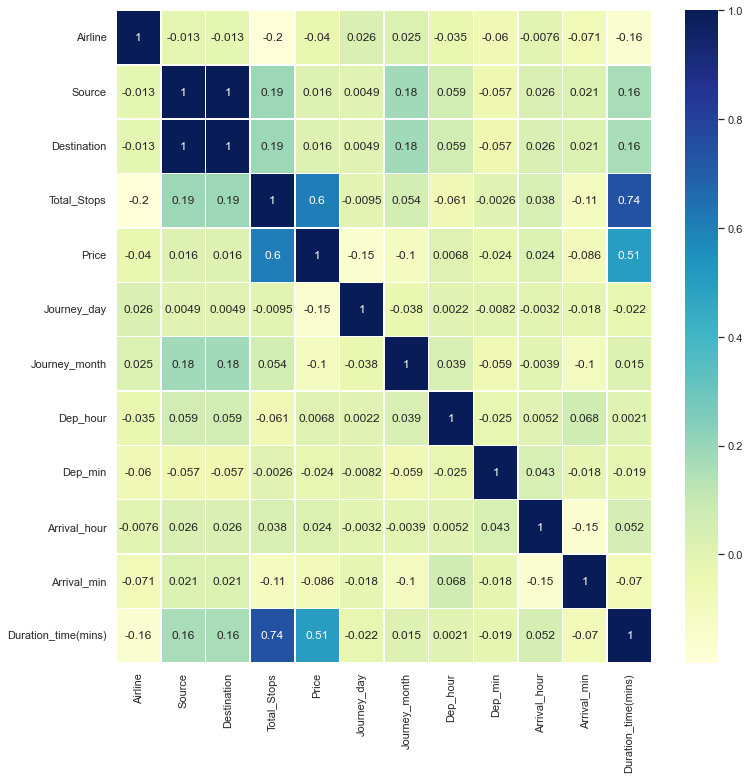

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,cmap="YlGnBu")

# Create target and features set  

In [38]:
x = df.drop('Price',axis=1)
y = df.Price

In [39]:
x.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_time(mins)
0,3,0,0,0,24,3,22,20,1,10,170
1,1,3,3,2,1,5,5,50,13,15,445
2,4,2,2,2,9,6,9,25,4,25,1140
3,3,3,3,1,12,5,18,5,23,30,325
4,3,0,0,1,1,3,16,50,21,35,285


# Create training and testing data 

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8545, 11), (2137, 11), (8545,), (2137,))

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model_li = LinearRegression()
model_li.fit(x_train,y_train)

LinearRegression()

# Print training and testing score

In [50]:
model_li.score(x_train,y_train)

0.4318947977671084

In [51]:
model_li.score(x_test,y_test)

0.4401929732065921

In [52]:
y_pred=model_li.predict(x_test)
y_pred

array([ 6511.09166264, 10578.77556751,  9269.65277359, ...,
        8465.91783089,  9462.16065935,  4137.20694093])

In [53]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

In [54]:
models=[Ridge,Lasso,DecisionTreeRegressor,SVR,RandomForestRegressor,GradientBoostingRegressor,KNeighborsRegressor,XGBRFRegressor]

for mod in models:
    reg = mod()
    reg = reg.fit(x_train,y_train)
    print(mod,reg.score(x_test,y_test))

<class 'sklearn.linear_model._ridge.Ridge'> 0.44019362989824573
<class 'sklearn.linear_model._coordinate_descent.Lasso'> 0.44019671361733226
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.6455975494038857
<class 'sklearn.svm._classes.SVR'> 0.15746448664042956
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.8012003973734652
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 0.7468025868558649
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.5785873024280384
<class 'xgboost.sklearn.XGBRFRegressor'> 0.7290545101031068


# Choosing Random Forest because of its best acuracy

In [57]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
y_pred=rf.predict(x_test)

In [62]:
rf.score(x_test,y_test)

0.8022387953896317

# Now apply Kfold and cross validation technique

In [63]:
from sklearn.model_selection import KFold,cross_val_score

In [64]:
kfold = KFold(n_splits=10)
cv_result =cross_val_score(rf,x_train,y_train,cv=kfold)

In [65]:
cv_result

array([0.81269394, 0.84103246, 0.75552867, 0.81814523, 0.78818864,
       0.81268937, 0.82520638, 0.82111848, 0.7708661 , 0.76074427])

# Show scatter plot b/w y_test and y_pred

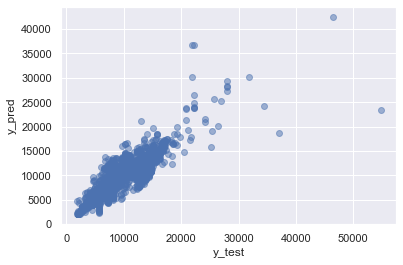

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Model Evalution 

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
mae=mean_absolute_error(y_test, y_pred)
mae

1215.6363891242124

In [69]:
mse=mean_squared_error(y_test, y_pred)
mse

4056218.842708875

In [70]:
r2_score(y_test, y_pred)

0.8022387953896317

In [71]:
import math
root_mean_squared_error=math.sqrt(mse)
root_mean_squared_error

2014.0056709723722